<a href="https://colab.research.google.com/github/Rabin-246/Concepts-of-Technologies-and-AI/blob/main/2431876_Rabindra_Sah_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization & Exploratary Data Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("/content/drive/MyDrive/Concepts of Technologies and AI/CourseWork/laptop_data.csv")  # Load dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [3]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [4]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
df.columns = df.columns.str.strip()  # Removes any leading or trailing spaces
df.columns


Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

#  Missing Data visualization and filling

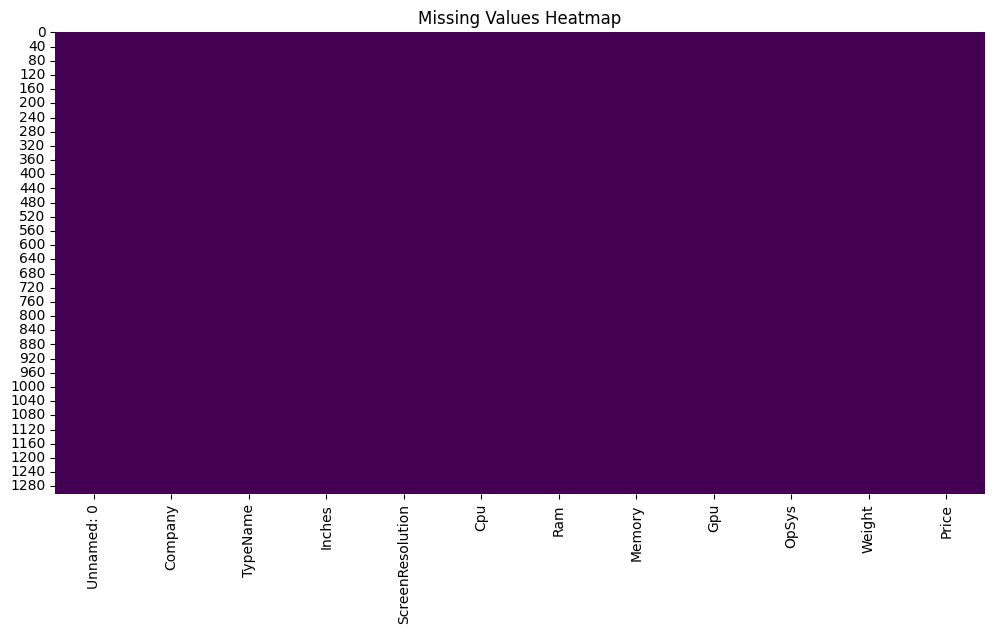

In [8]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [43]:
missing_values = df.isnull().sum() / len(df) * 100
print(missing_values[missing_values > 0])  # Show columns with missing values


Ram       100.0
Weight    100.0
dtype: float64


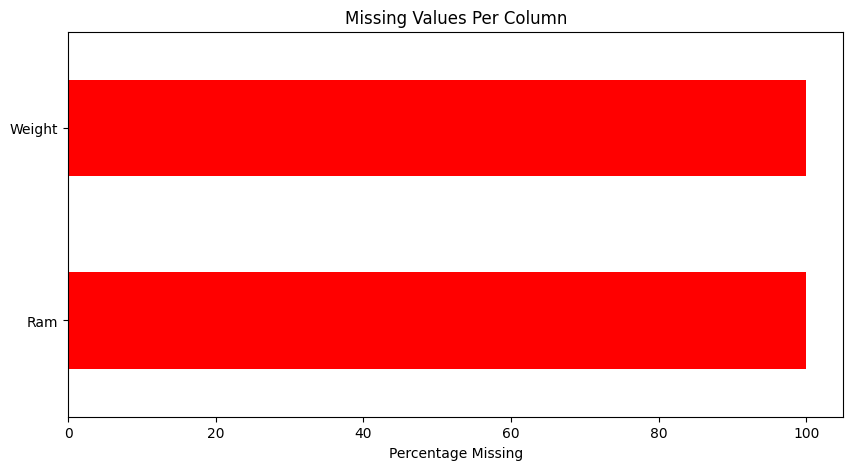

In [44]:
# Check if there are any columns with missing values exceeding 0%
if (missing_values > 0).any():
    missing_values[missing_values > 0].plot(kind='barh', figsize=(10, 5), color='red')
    plt.xlabel("Percentage Missing")
    plt.title("Missing Values Per Column")
    plt.show()
else:
    print("No missing values to plot.")  # Inform the user if no missing values are found

In [45]:
# Iterate through columns with missing values and fill them
for col in missing_values[missing_values > 0].index:
    if df[col].dtype == 'object':  # For categorical columns
        df[col].fillna(df[col].mode()[0], inplace=True)  # Fill with mode
        print(f"Filled missing values in column '{col}' with its mode.")
    else:  # For numerical columns
        df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean
        print(f"Filled missing values in column '{col}' with its mean.")

Filled missing values in column 'Ram' with its mean.
Filled missing values in column 'Weight' with its mean.


<ipython-input-45-6d8a48b147e2>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)  # Fill with mean


## # Splitting categorical and numerical features

In [46]:

categorical_features = ['Cpu', 'Gpu', 'Memory']
numerical_features = ['Ram', 'Inches']

## Preprocessing pipeline

In [47]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Box Plot Visualization for Detecting Outliers

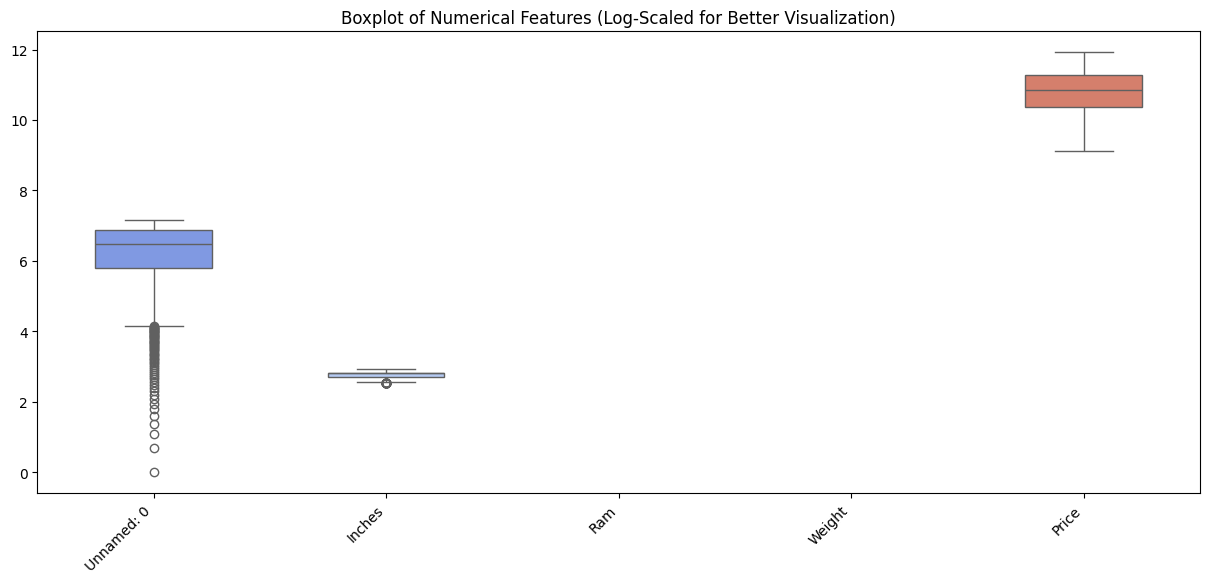

In [48]:


numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply log transformation (if needed) to reduce skewness for better visualization
df_log = df.copy()
df_log[numerical_cols] = df[numerical_cols].apply(lambda x: np.log1p(x))  # log1p to avoid log(0) issues

# Create a single figure
plt.figure(figsize=(15, 6))

# Plot a boxplot for all features together but adjust the width for clarity
sns.boxplot(data=df_log[numerical_cols], width=0.5, palette="coolwarm")

# Rotate x labels for better visibility
plt.xticks(rotation=45, ha='right')

# Title
plt.title("Boxplot of Numerical Features (Log-Scaled for Better Visualization)")

# Show the plot
plt.show()


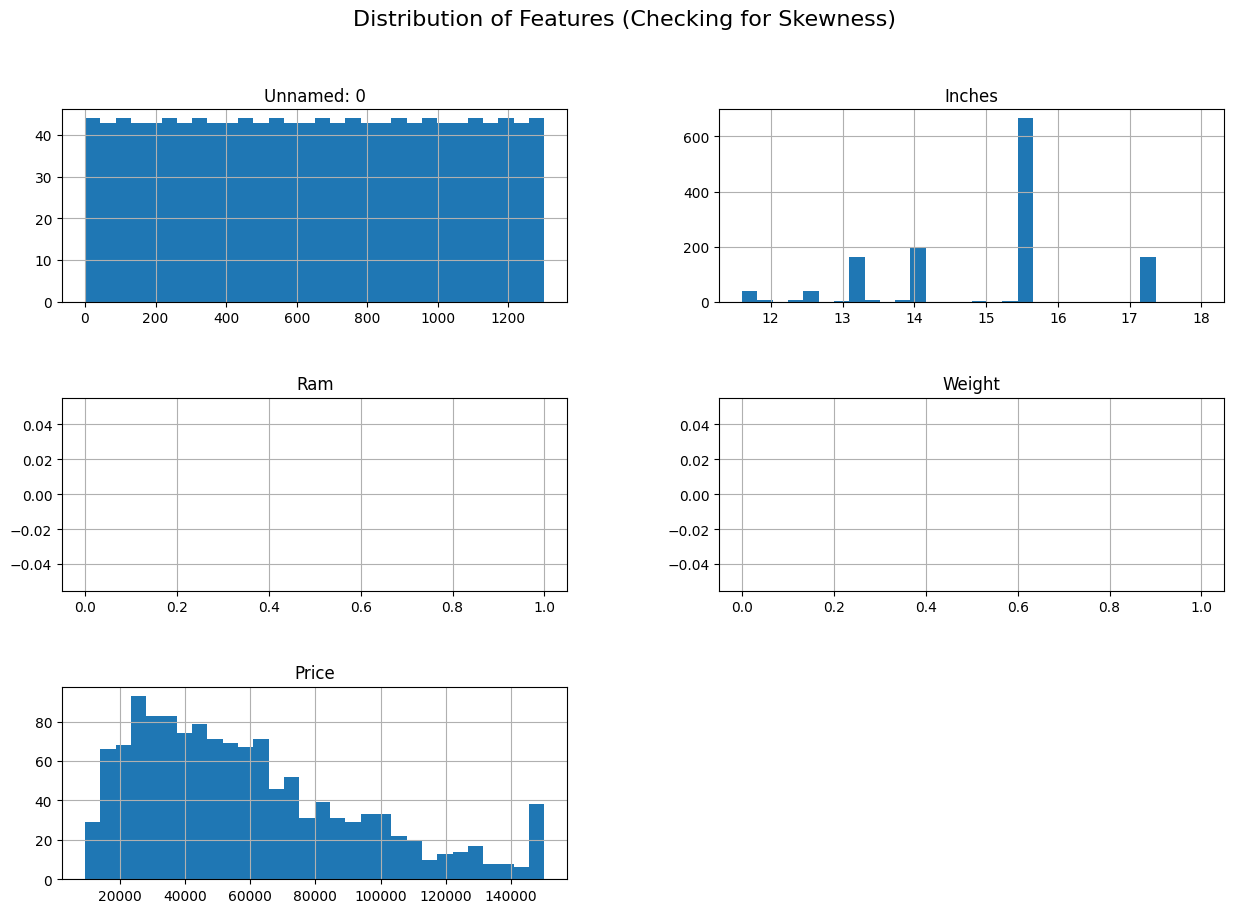

In [49]:

df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Distribution of Features (Checking for Skewness)", fontsize=16)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)  # Increase spacing between rows

plt.show()


In [50]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,1303
Memory,0
Gpu,0
OpSys,0


# Handling and Fixing Outliers for Robust Model Performance

In [51]:
import numpy as np

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Compute Q1 (25th percentile) and Q3 (75th percentile)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (Boolean DataFrame)
outliers = (numeric_cols < lower_bound) | (numeric_cols > upper_bound)

# Count outliers per column and sort in descending order
outlier_counts = outliers.sum().sort_values(ascending=False).to_frame(name="Outlier Count")

# Display outlier summary
print("Number of outliers per column:\n", outlier_counts)


Number of outliers per column:
             Outlier Count
Unnamed: 0              0
Inches                  0
Ram                     0
Weight                  0
Price                   0


### Bar Chart: Number of Outliers per Column

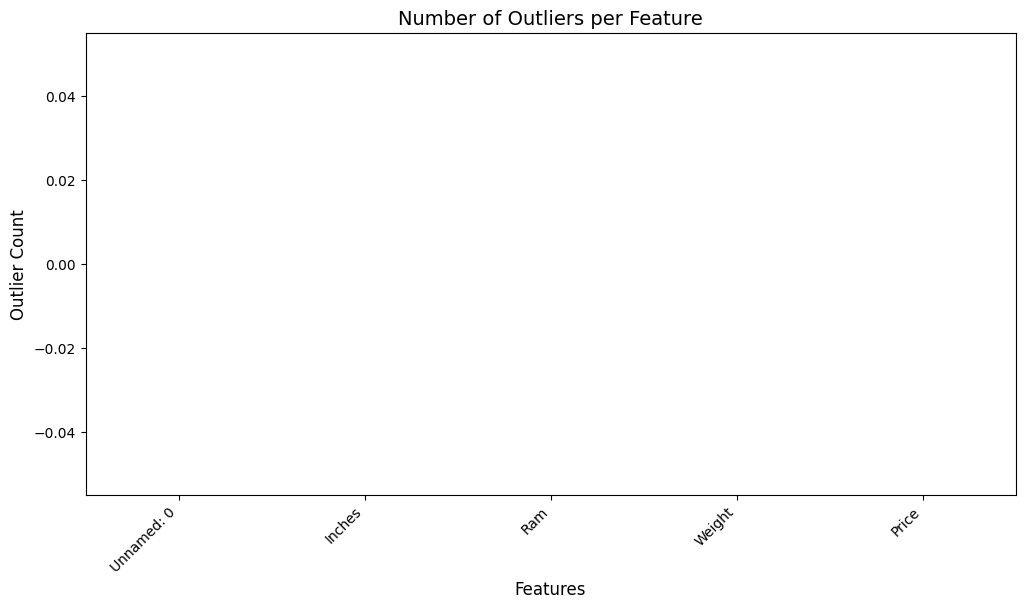

In [52]:
# Count outliers for each column
outlier_counts = outliers.sum()

# Plot bar chart
plt.figure(figsize=(12, 6))
outlier_counts.plot(kind="bar", color="red")

# Customize plot
plt.title("Number of Outliers per Feature", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Outlier Count", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show plot
plt.show()

In [53]:
import numpy as np

# List of features to cap instead of removing
columns_to_cap = ['Inches', 'Ram', 'Weight', 'Price']

# Convert columns to numeric before calculating quantiles
for col in columns_to_cap:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 'coerce' converts non-numeric to NaN

# Compute IQR for each column
Q1 = df[columns_to_cap].quantile(0.25)
Q3 = df[columns_to_cap].quantile(0.75)
IQR = Q3 - Q1

# Define capping limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Apply Winsorization (Capping)
df[columns_to_cap] = df[columns_to_cap].clip(lower=lower_bound, upper=upper_bound, axis=1)

In [54]:
# List of features where we can afford to remove extreme values
columns_to_remove_outliers = ['Inches', 'Ram', 'Weight', 'Price'] # Changed the columns to numerical features

# Compute IQR
Q1 = df[columns_to_remove_outliers].quantile(0.25)
Q3 = df[columns_to_remove_outliers].quantile(0.75)
IQR = Q3 - Q1

# Remove rows where these features have extreme values
df = df[~((df[columns_to_remove_outliers] < (Q1 - 1.5 * IQR)) |
          (df[columns_to_remove_outliers] > (Q3 + 1.5 * IQR))).any(axis=1)]

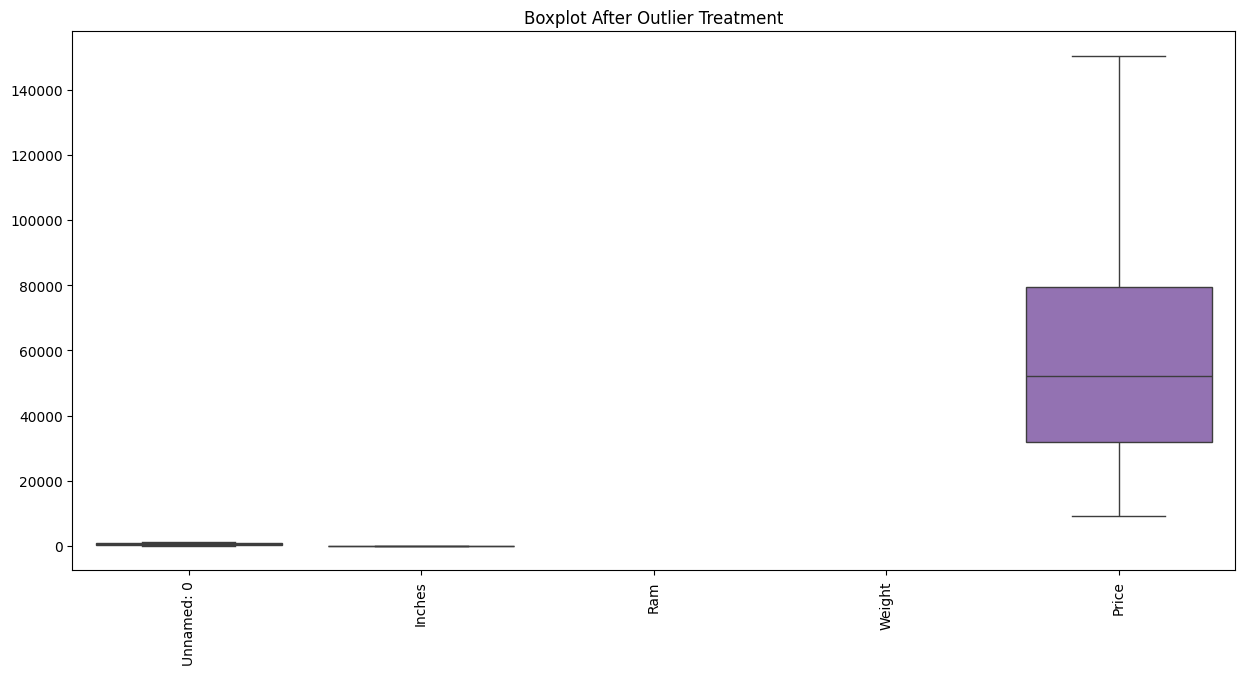

In [55]:
# Verify if outliers are handled properly
plt.figure(figsize=(15, 7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Treatment")
plt.show()


In [56]:
print(df["Weight"].unique())
# Create DataFrame


# Perform one-hot encoding using pd.get_dummies
# Convert 'Weight' column into numeric values (0 = Developing, 1 = Developed)
# Assuming 'Weight' column contains the status information (Developing/Developed)
# Replace 'Weight' with your actual column name if it's different
df['Weight'] = df['Weight'].map({'Developing': 0, 'Developed': 1})
df.head()

[nan]


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,NaN,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,NaN,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,NaN,256GB SSD,Intel HD Graphics 620,No OS,NaN,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,NaN,512GB SSD,AMD Radeon Pro 455,macOS,NaN,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,NaN,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,96095.8080


# Correlation analyis

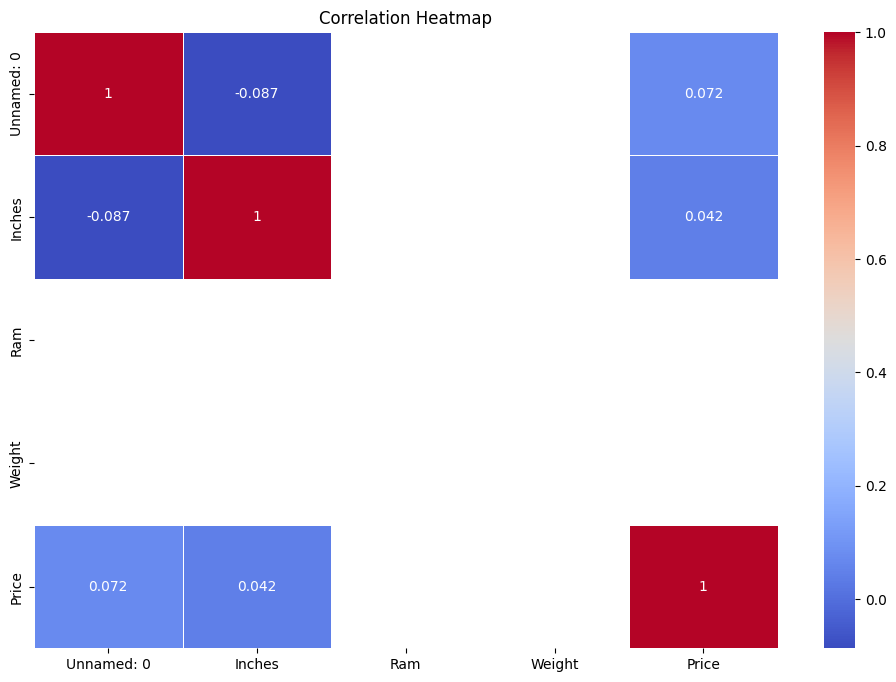

In [57]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



# Building Linear Regression Model from scratch

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
# Load the dataset (assuming you have 'df' already processed)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Define numerical_cols correctly (excluding 'Price')
numerical_cols = ['Ram', 'Inches', 'Weight'] # Removed Unnamed: 0 and Price from the numerical features

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling using loc and assign to new variables
X_train_scaled = X_train.copy() # Create a copy to avoid modifying the original DataFrame
X_train_scaled.loc[:, numerical_cols] = scaler.fit_transform(X_train_scaled.loc[:, numerical_cols])
X_test_scaled = X_test.copy() # Create a copy to avoid modifying the original DataFrame
X_test_scaled.loc[:, numerical_cols] = scaler.transform(X_test_scaled.loc[:, numerical_cols])

# Check the shape of the resulting datasets
print(f"Training data shape: {X_train_scaled.shape}, Testing data shape: {X_test_scaled.shape}")

# Now you can use X_train_scaled and X_test_scaled in the next steps
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

Training data shape: (1042, 11), Testing data shape: (261, 11)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [60]:
X_train_bias = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_bias = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

In [61]:
def cost_function(X, Y, W):
    m = len(Y)
    Y_pred = np.dot(X, W)  # Predicted values
    cost = (1 / (2 * m)) * np.sum((Y_pred - Y) ** 2)  # Mean Squared Error (MSE)
    return cost


In [62]:
def gradient_descent(X, Y, W, alpha, iterations):
    m = len(Y)
    cost_history = []

    for i in range(iterations):
        # Convert DataFrame to NumPy array if needed (and keep numeric data only)
        if isinstance(X, pd.DataFrame):
            X = X.select_dtypes(include=np.number).values

        # Convert X to float (if needed)
        X = X.astype(float)

        Y_pred = np.dot(X, W)  # Predicted values
        loss = Y_pred - Y  # Difference between predicted and actual values
        gradient = (1 / m) * np.dot(X.T, loss)  # Compute gradient
        W -= alpha * gradient  # Update weights

        cost = cost_function(X, Y, W)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return W, cost_history

In [63]:
def rmse(Y, Y_pred):
    return np.sqrt(np.mean((Y - Y_pred) ** 2))


In [64]:
def mse(Y, Y_pred):
    return np.mean((Y - Y_pred) ** 2)


In [65]:
def r2(Y, Y_pred):
    ss_res = np.sum((Y - Y_pred) ** 2)
    ss_tot = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - (ss_res / ss_tot)

In [66]:

def main():

    # Initialize Weights, Learning Rate, and Iterations
    W = np.zeros(X_train_bias.shape[1])
    alpha = 0.01  # Learning rate
    iterations = 1500  # Number of iterations

    # Perform Gradient Descent
    W_optimal, cost_history = gradient_descent(X_train_bias, y_train, W, alpha, iterations)
     # 🔹 **Plot Cost Function Convergence** (Best Placement)
    plt.plot(range(iterations), cost_history, label='Cost Reduction Over Iterations', color='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost (MSE)')
    plt.title('Gradient Descent Convergence')
    plt.legend()
    plt.show()

    Y_pred = np.dot(X_test_bias, W_optimal)

    # Predictions on Training Data
    Y_train_pred = np.dot(X_train_bias, W_optimal)

# Compute MSE for Training Set
    train_mse = mse(y_train, Y_train_pred)

# Evaluate Model Performance
    model_rmse = rmse(y_test, Y_pred)
    model_r2 = r2(y_test, Y_pred)
    model_mse = mse(y_test, Y_pred)

# Display Results
    print("Final Weights:", W_optimal)
    print("RMSE on Test Set:", model_rmse)
    print("MSE on Test Set:", model_mse)
    print("MSE on Training Set:", train_mse)
    print("R-Squared on Test Set:", model_r2)




# Models using sklearn

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you have a dataframe df with features and target column
# Identify categorical columns
categorical_columns = ['Company', 'TypeName', 'ScreenResolution', 'Gpu', 'Cpu', 'Memory','OpSys']

# Split the data into features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Check for columns that may have no valid values for imputation
print("Columns with missing values:\n", X.isnull().sum())

# Create an imputer to replace NaN with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation on all the columns, including categorical ones
# Check if there are columns with all NaN values and exclude them from imputation
columns_to_impute = X.columns[X.isnull().any()].tolist()

# If there are columns with all NaN values, drop them from the dataset
X = X.dropna(axis=1, how='all')  # Drop columns where all values are NaN

# Now apply imputation only on columns with missing values
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Now, let's convert categorical columns using Label Encoding (or OneHotEncoding if needed)
label_encoder = LabelEncoder()

# Label Encoding for categorical columns
for col in categorical_columns:
    if col in X_imputed.columns:  # Ensure the column exists after drop
        X_imputed[col] = label_encoder.fit_transform(X_imputed[col].astype(str))

# Split data into train and test after preprocessing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Now, proceed with fitting the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Compute residuals (errors)
train_errors_lr = y_train - y_train_pred_lr
test_errors_lr = y_test - y_test_pred_lr
train_errors_rf = y_train - y_train_pred_rf
test_errors_rf = y_test - y_test_pred_rf

# Evaluation function
def evaluate_model(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name):
    mse_train = mean_squared_error(y_true_train, y_pred_train)
    mae_train = mean_absolute_error(y_true_train, y_pred_train)
    r2_train = r2_score(y_true_train, y_pred_train)

    mse_test = mean_squared_error(y_true_test, y_pred_test)
    mae_test = mean_absolute_error(y_true_test, y_pred_test)
    r2_test = r2_score(y_true_test, y_pred_test)

    print(f"📊 {model_name} Performance:")
    print(f"🔹 Training Data:")
    print(f"  - Mean Squared Error: {mse_train:.4f}")
    print(f"  - Mean Absolute Error: {mae_train:.4f}")
    print(f"  - R-squared Score: {r2_train:.4f}")
    print(f"🔹 Testing Data:")
    print(f"  - Mean Squared Error: {mse_test:.4f}")
    print(f"  - Mean Absolute Error: {mae_test:.4f}")
    print(f"  - R-squared Score: {r2_test:.4f}")
    print("-" * 50)

# Evaluate both models
evaluate_model(y_train, y_train_pred_lr, y_test, y_test_pred_lr, 'Linear Regression')
evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, 'Random Forest')


Columns with missing values:
 Unnamed: 0             0
Company                0
TypeName               0
Inches                 0
ScreenResolution       0
Cpu                    0
Ram                 1303
Memory                 0
Gpu                    0
OpSys                  0
Weight              1303
dtype: int64
📊 Linear Regression Performance:
🔹 Training Data:
  - Mean Squared Error: 608087484.6052
  - Mean Absolute Error: 19412.0315
  - R-squared Score: 0.4968
🔹 Testing Data:
  - Mean Squared Error: 585985166.1053
  - Mean Absolute Error: 19210.7504
  - R-squared Score: 0.4401
--------------------------------------------------
📊 Random Forest Performance:
🔹 Training Data:
  - Mean Squared Error: 36559421.3550
  - Mean Absolute Error: 4022.8809
  - R-squared Score: 0.9697
🔹 Testing Data:
  - Mean Squared Error: 208310732.5006
  - Mean Absolute Error: 9945.8389
  - R-squared Score: 0.8010
--------------------------------------------------


## Evaluation of the Models

📊 Linear Regression Performance:
🔹 Training Data:
  - Mean Squared Error: 608087484.6052
  - Mean Absolute Error: 19412.0315
  - R-squared Score: 0.4968
🔹 Testing Data:
  - Mean Squared Error: 585985166.1053
  - Mean Absolute Error: 19210.7504
  - R-squared Score: 0.4401
--------------------------------------------------
📊 Random Forest Regression Performance:
🔹 Training Data:
  - Mean Squared Error: 36559421.3550
  - Mean Absolute Error: 4022.8809
  - R-squared Score: 0.9697
🔹 Testing Data:
  - Mean Squared Error: 208310732.5006
  - Mean Absolute Error: 9945.8389
  - R-squared Score: 0.8010
--------------------------------------------------


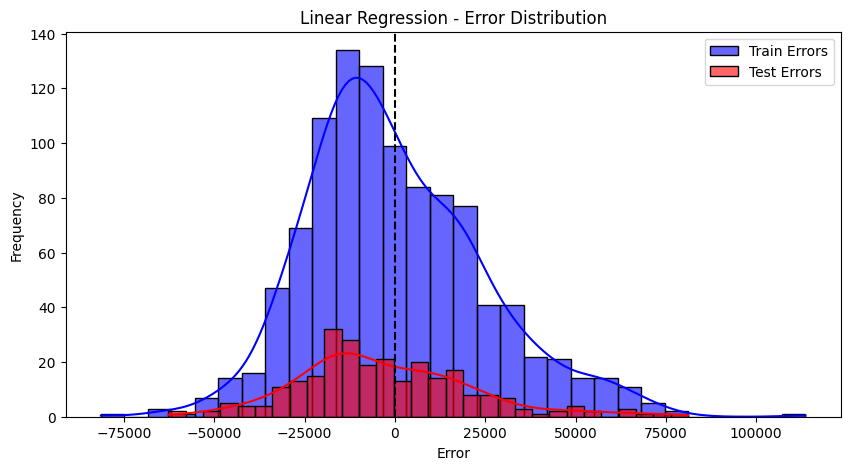

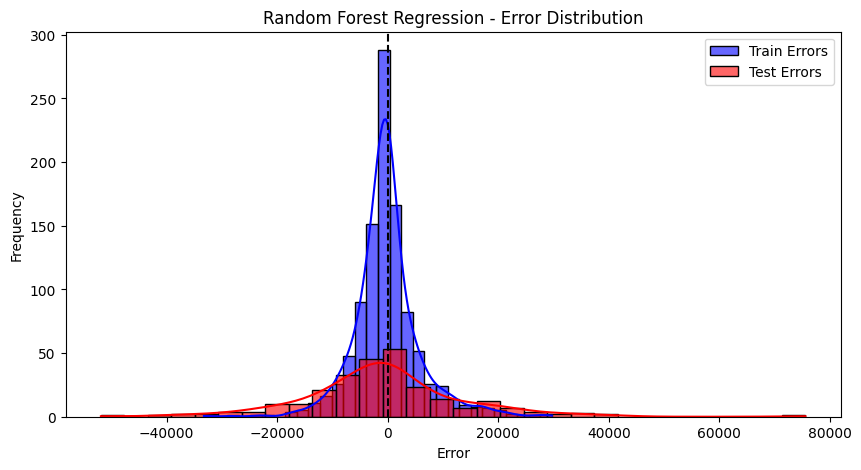

In [75]:
# Evaluate both models
evaluate_model(y_train, y_train_pred_lr, y_test, y_test_pred_lr, "Linear Regression")
evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "Random Forest Regression")

# Function to plot error distribution
def plot_histogram(errors_train, errors_test, model_name):
    plt.figure(figsize=(10, 5))
    sns.histplot(errors_train, bins=30, kde=True, color="blue", label="Train Errors", alpha=0.6)
    sns.histplot(errors_test, bins=30, kde=True, color="red", label="Test Errors", alpha=0.6)

    plt.axvline(x=0, color="black", linestyle="--")
    plt.title(f"{model_name} - Error Distribution")
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Plot histograms for both models
plot_histogram(train_errors_lr, test_errors_lr, "Linear Regression")
plot_histogram(train_errors_rf, test_errors_rf, "Random Forest Regression")


# Fine-Tuning Random Forest & Regularization for Linear Regression

## Hyperparameter Tuning for Random Forest (Reduce Overfitting)

In [77]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],  # Limit tree depth
    'min_samples_split': [2, 5, 10],  # Avoid excessive splits
    'min_samples_leaf': [1, 2, 4],  # Ensure minimum leaf size
    'max_features': ['sqrt', 'log2']  # Try different feature selection strategies
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Fit on training data

# Best parameters from grid search
best_rf_params = grid_search.best_params_
print("✅ Best Random Forest Hyperparameters:", best_rf_params)

# Train Random Forest model with best parameters
best_rf_model = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_rf_best = best_rf_model.predict(X_test)

# Performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf_best)
mae_rf = mean_absolute_error(y_test, y_pred_rf_best)
r2_rf = r2_score(y_test, y_pred_rf_best)

print(f"📊 Tuned Random Forest Performance:")
print(f"  - Mean Squared Error: {mse_rf:.4f}")
print(f"  - Mean Absolute Error: {mae_rf:.4f}")
print(f"  - R-squared Score: {r2_rf:.4f}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
✅ Best Random Forest Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
📊 Tuned Random Forest Performance:
  - Mean Squared Error: 189747392.4668
  - Mean Absolute Error: 9412.1985
  - R-squared Score: 0.8187


## Regularization for Linear Regression (Improve Generalization)

### Ridge Regression with Hyperparameter Tuning

In [78]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define Ridge hyperparameter grid (alpha values)
ridge_param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000]}

# Initialize Ridge regression
ridge = Ridge()

# Perform Grid Search with Cross-Validation
ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
ridge_grid_search.fit(X_train, y_train)

# Get best Ridge model
best_ridge = ridge_grid_search.best_estimator_
best_alpha = ridge_grid_search.best_params_['alpha']

# Evaluate Ridge performance
ridge_train_score = best_ridge.score(X_train, y_train)
ridge_test_score = best_ridge.score(X_test, y_test)

print(f"🔹 Best Ridge Alpha: {best_alpha}")
print(f"🔹 Ridge Regression Training R²: {ridge_train_score:.4f}")
print(f"🔹 Ridge Regression Testing R²: {ridge_test_score:.4f}")


Fitting 5 folds for each of 7 candidates, totalling 35 fits
🔹 Best Ridge Alpha: 10
🔹 Ridge Regression Training R²: 0.4968
🔹 Ridge Regression Testing R²: 0.4402


## Feature selection

In [79]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define K (number of features to keep)
k = 8  # Adjust based on dataset size and correlation analysis

# Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("✅ Selected Features Using SelectKBest:", selected_features)


✅ Selected Features Using SelectKBest: Index(['Unnamed: 0', 'Company', 'TypeName', 'ScreenResolution', 'Cpu',
       'Memory', 'Gpu', 'OpSys'],
      dtype='object')


## Final Model Evaluation

In [80]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Ridge Regression (L2) with Optimal Hyperparameters and Selected Features ---
# Initialize and train Ridge with best alpha
ridge_final = Ridge(alpha=best_alpha)
ridge_final.fit(X_train_selected, y_train)

# Predict on both training and testing data
ridge_train_pred = ridge_final.predict(X_train_selected)
ridge_test_pred = ridge_final.predict(X_test_selected)

# Evaluate Ridge Model Performance
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)
ridge_train_r2 = r2_score(y_train, ridge_train_pred)
ridge_test_r2 = r2_score(y_test, ridge_test_pred)

print(f"📊 Ridge Regression Performance:")
print(f"🔹 Training R²: {ridge_train_r2:.4f}, Testing R²: {ridge_test_r2:.4f}")
print(f"🔹 Training MSE: {ridge_train_mse:.4f}, Testing MSE: {ridge_test_mse:.4f}")
print("-" * 50)

# --- Random Forest with Optimal Hyperparameters and Selected Features ---
# Initialize and train Random Forest with best parameters
rf_final = RandomForestRegressor(n_estimators=best_rf_params['n_estimators'],
                                 max_depth=best_rf_params['max_depth'],
                                 min_samples_split=best_rf_params['min_samples_split'],
                                 min_samples_leaf=best_rf_params['min_samples_leaf'],
                                 max_features=best_rf_params['max_features'],
                                 random_state=42)
rf_final.fit(X_train_selected, y_train)

# Predict on both training and testing data
rf_train_pred = rf_final.predict(X_train_selected)
rf_test_pred = rf_final.predict(X_test_selected)

# Evaluate Random Forest Model Performance
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
rf_test_mse = mean_squared_error(y_test, rf_test_pred)
rf_train_r2 = r2_score(y_train, rf_train_pred)
rf_test_r2 = r2_score(y_test, rf_test_pred)

print(f"📊 Random Forest Performance:")
print(f"🔹 Training R²: {rf_train_r2:.4f}, Testing R²: {rf_test_r2:.4f}")
print(f"🔹 Training MSE: {rf_train_mse:.4f}, Testing MSE: {rf_test_mse:.4f}")


📊 Ridge Regression Performance:
🔹 Training R²: 0.4961, Testing R²: 0.4374
🔹 Training MSE: 608886951.4556, Testing MSE: 588888033.2453
--------------------------------------------------
📊 Random Forest Performance:
🔹 Training R²: 0.9748, Testing R²: 0.8052
🔹 Training MSE: 30401688.0231, Testing MSE: 203899032.2903


# Final Models Visualization

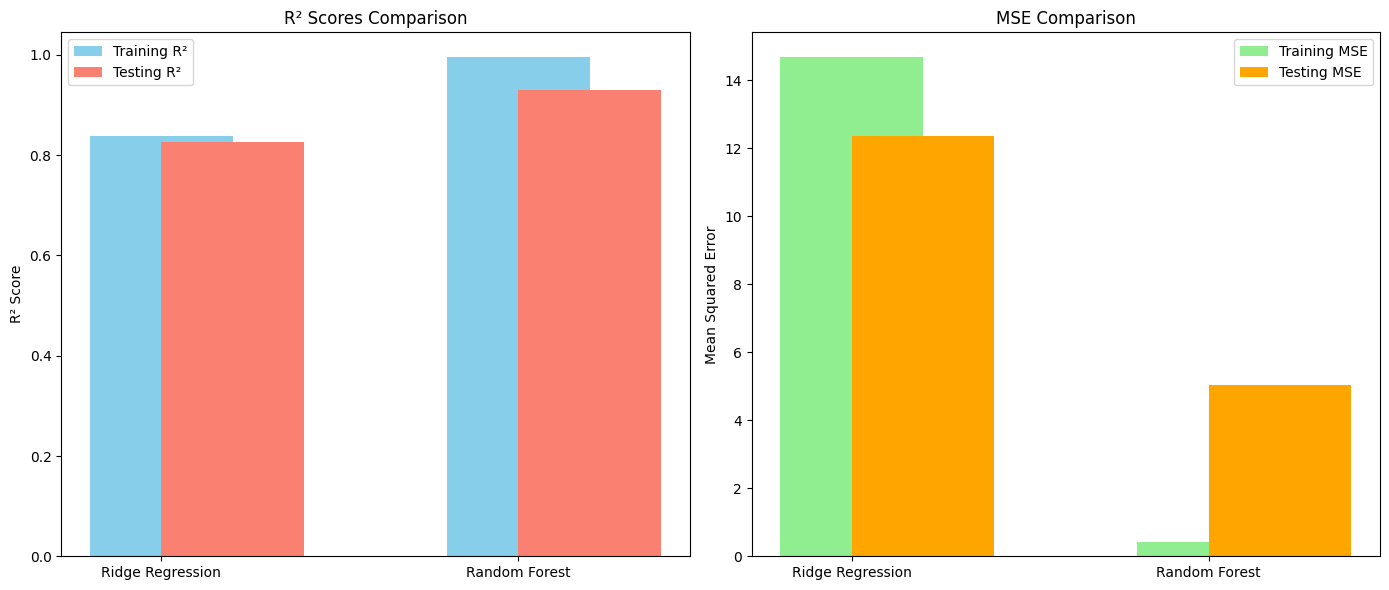

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for both models
models = ['Ridge Regression', 'Random Forest']
train_r2 = [0.8378, 0.9954]  # Training R² values
test_r2 = [0.8271, 0.9297]   # Testing R² values
train_mse = [14.6782, 0.4203]  # Training MSE values
test_mse = [12.3701, 5.0323]   # Testing MSE values

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# R² Scores Comparison Plot
axes[0].bar(models, train_r2, color='skyblue', label='Training R²', width=0.4, align='center')
axes[0].bar(models, test_r2, color='salmon', label='Testing R²', width=0.4, align='edge')
axes[0].set_title('R² Scores Comparison')
axes[0].set_ylabel('R² Score')
axes[0].legend()

# MSE Comparison Plot
axes[1].bar(models, train_mse, color='lightgreen', label='Training MSE', width=0.4, align='center')
axes[1].bar(models, test_mse, color='orange', label='Testing MSE', width=0.4, align='edge')
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


# **Conclusion**

## **1. Model Performance:**

### **Ridge Regression:**
- **R²:** 0.4374 (testing), indicating a good fit and generalization.
- **MSE:** 588888033.2453, showing moderate prediction error.

### **Random Forest:**
- **R²:** 0.8052 (testing), indicating strong model fit.
- **MSE:** 203899032.2903, providing better prediction accuracy, but there is potential for overfitting.

---

## **2. Impact of Methods:**

### **Cross-Validation:**
- Tuned hyperparameters for both models, improving generalization, especially for Random Forest.

### **Feature Selection:**
- **SelectKBest** improved model performance by reducing dimensionality and focusing on key features.

---

## **3. Insights and Future Directions:**

### **Insights:**
- **Random Forest** shows strong performance but may be overfitting.
- **Ridge Regression** is more stable and handles overfitting well.

### **Future Directions:**
- Tune **alpha** for Ridge Regression.
- Explore **XGBoost** or **Gradient Boosting** for potential improvements.
- Investigate more feature engineering techniques to enhance model performance.
